# Steamdb.csv
 https://www.kaggle.com/datasets/shoybhasan/most-played-games-steamdb

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Wczytanie danych
df = pd.read_csv("DBs/Steamdb.csv")

# Czyszczenie danych
df.columns = df.columns.str.strip()  # Usunięcie spacji z nazw kolumn
numeric_columns = ['Current', '24th Peak', 'All-Time Peak']
for col in numeric_columns:
    df[col] = df[col].replace(',', '', regex=True).astype(int)
    

In [27]:
# Połączenie z bazą
conn = sqlite3.connect("Steamdb.db")
df.to_sql("steam_dane", conn, if_exists="replace", index=False)

# Sprawdzenie, czy dane zostały zapisane poprawnie
pd.read_sql("SELECT * FROM steam_dane;", conn)


,ID,Name,Current,24th Peak,All-Time Peak
0,1,Counter-Strike: Global Offensive,1377518,1377518,1519457
1,2,Dota 2,558728,596629,1295114
2,3,Apex Legends,534000,554438,624473
3,4,PUBG: BATTLEGROUNDS,404378,405635,3257248
4,5,Grand Theft Auto V,140771,140771,364548
...,...,...,...,...,...
6285,6286,Mad Driver,0,0,1002
6286,6287,ThrounnelVR,0,1,1001
6287,6288,Escape From Nazi Labs,0,0,1000
6288,6289,OutSplit,0,0,1000


In [28]:
# Podstawowa eksploracja danych
print("Podstawowe informacje:")
print(df.info())
print("\nBrakujące wartości:")
print(df.isnull().sum())
print("\nPodstawowe statystyki:")
print(df.describe())


Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6290 non-null   int64 
 1   Name           6290 non-null   object
 2   Current        6290 non-null   int64 
 3   24th Peak      6290 non-null   int64 
 4   All-Time Peak  6290 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 245.8+ KB
None

Brakujące wartości:
ID               0
Name             0
Current          0
24th Peak        0
All-Time Peak    0
dtype: int64

Podstawowe statystyki:
                ID       Current     24th Peak  All-Time Peak
count  6290.000000  6.290000e+03  6.290000e+03   6.290000e+03
mean   3145.500000  1.312797e+03  1.453831e+03   1.163131e+04
std    1815.910928  2.132039e+04  2.172662e+04   6.538860e+04
min       1.000000  0.000000e+00  0.000000e+00   5.100000e+01
25%    1573.250000  1.000000e+00  4.000000e+00   1

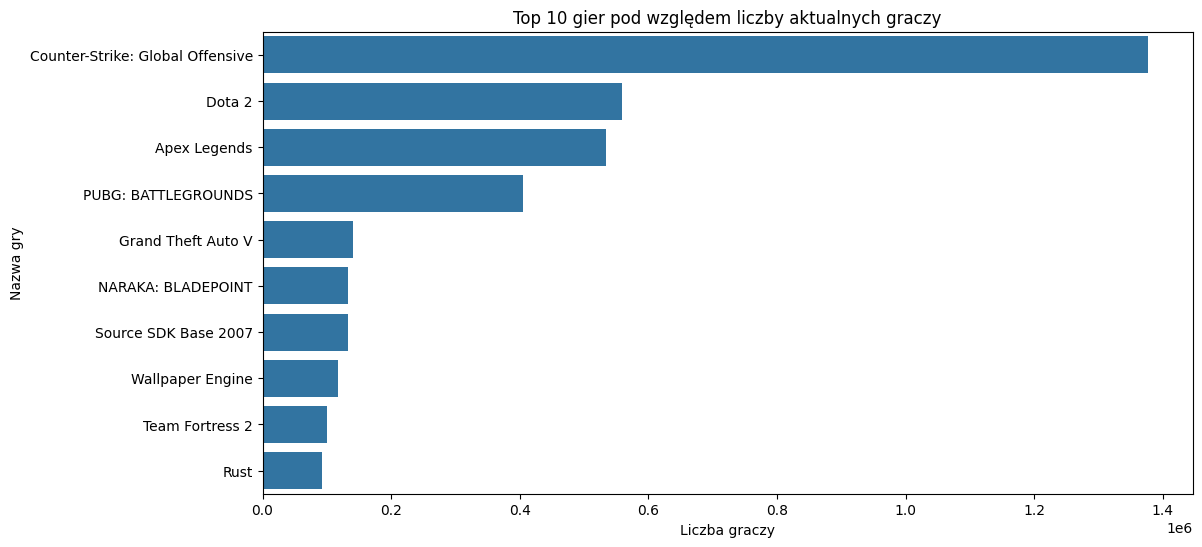

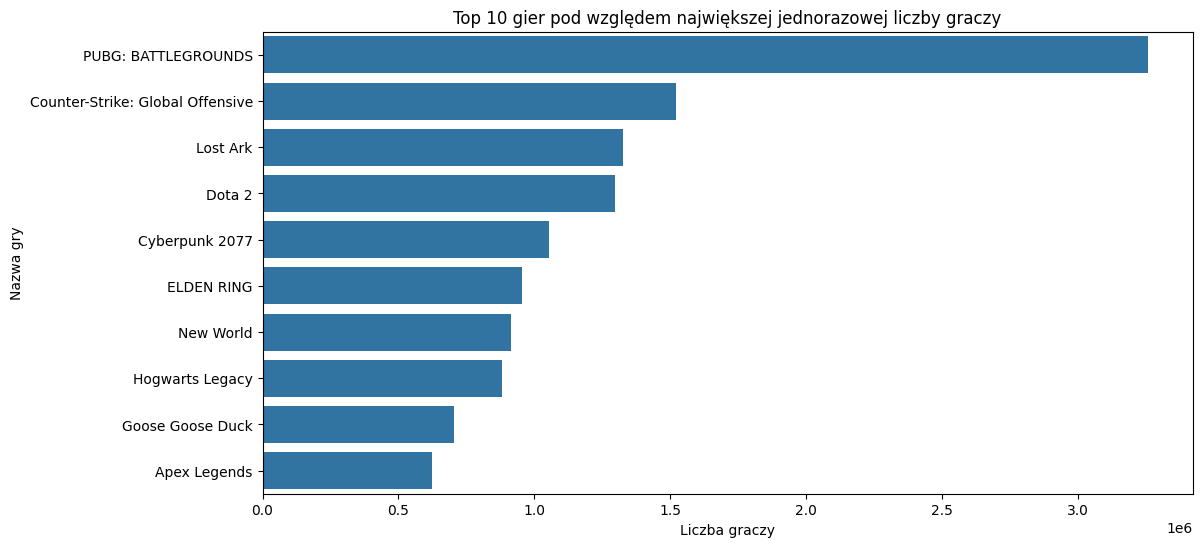

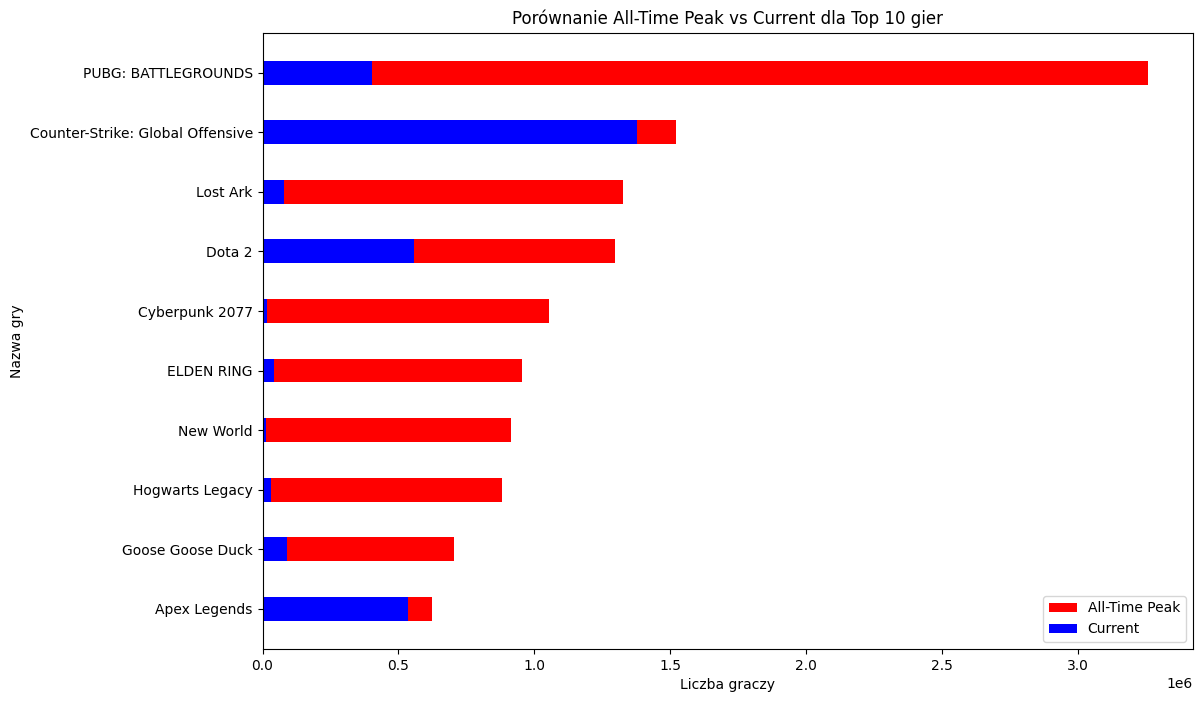

In [29]:
# Top 20 gier pod względem liczby aktualnych graczy
top_games = df.nlargest(10, 'Current')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_games['Name'], x=top_games['Current'])
plt.title("Top 10 gier pod względem liczby aktualnych graczy")
plt.xlabel("Liczba graczy")
plt.ylabel("Nazwa gry")
plt.show()

# Top 10 gier pod względem największej jednorazowej liczby graczy
top_games = df.nlargest(10, 'All-Time Peak')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_games['Name'], x=top_games['All-Time Peak'])
plt.title("Top 10 gier pod względem największej jednorazowej liczby graczy")
plt.xlabel("Liczba graczy")
plt.ylabel("Nazwa gry")
plt.show()

# Porównanie All-Time Peak oraz Current dla Top 10 gier
top_10 = df.nlargest(10, 'All-Time Peak')
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(top_10))

plt.barh(index, top_10['All-Time Peak'], bar_width, label='All-Time Peak', color='red')
plt.barh(index, top_10['Current'], bar_width, label='Current', color='blue')

plt.yticks(index, top_10['Name'])
plt.xlabel("Liczba graczy")
plt.ylabel("Nazwa gry")
plt.title("Porównanie All-Time Peak vs Current dla Top 10 gier")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


# vgsales.csv
 https://www.kaggle.com/datasets/arslanali4343/sales-of-video-games

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
df = pd.read_csv("DBs/vgsales.csv")


In [31]:
import sqlite3
# Połączenie z bazą
conn = sqlite3.connect("vgsales.db")
df.to_sql("vgsales_dane", conn, if_exists="replace", index=False)

# Sprawdzenie, czy dane zostały zapisane poprawnie
pd.read_sql("SELECT * FROM vgsales_dane;", conn)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [32]:
# Czyszczenie danych
df.columns = df.columns.str.strip()  # Usunięcie spacji z nazw kolumn

# Filtrowanie tylko dla platformy PC
df = df[df['Platform'] == 'PC']

# Uzupełnianie brakujących wartości
# - Rok: zastąpienie medianą
# - Publisher: zastąpienie "Unknown"
df = df.assign(Year=df['Year'].fillna(df['Year'].median()),
               Publisher=df['Publisher'].fillna("Unknown"))

# Konwersja roku na int
df['Year'] = df['Year'].astype(int)

# Podstawowa eksploracja danych
print("Podstawowe informacje:")
print(df.info())
print("\nBrakujące wartości:")
print(df.isnull().sum())
print("\nPodstawowe statystyki:")
print(df.describe())


Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 83 to 16591
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          960 non-null    int64  
 1   Name          960 non-null    object 
 2   Platform      960 non-null    object 
 3   Year          960 non-null    int64  
 4   Genre         960 non-null    object 
 5   Publisher     960 non-null    object 
 6   NA_Sales      960 non-null    float64
 7   EU_Sales      960 non-null    float64
 8   JP_Sales      960 non-null    float64
 9   Other_Sales   960 non-null    float64
 10  Global_Sales  960 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 90.0+ KB
None

Brakujące wartości:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Podstawowe sta

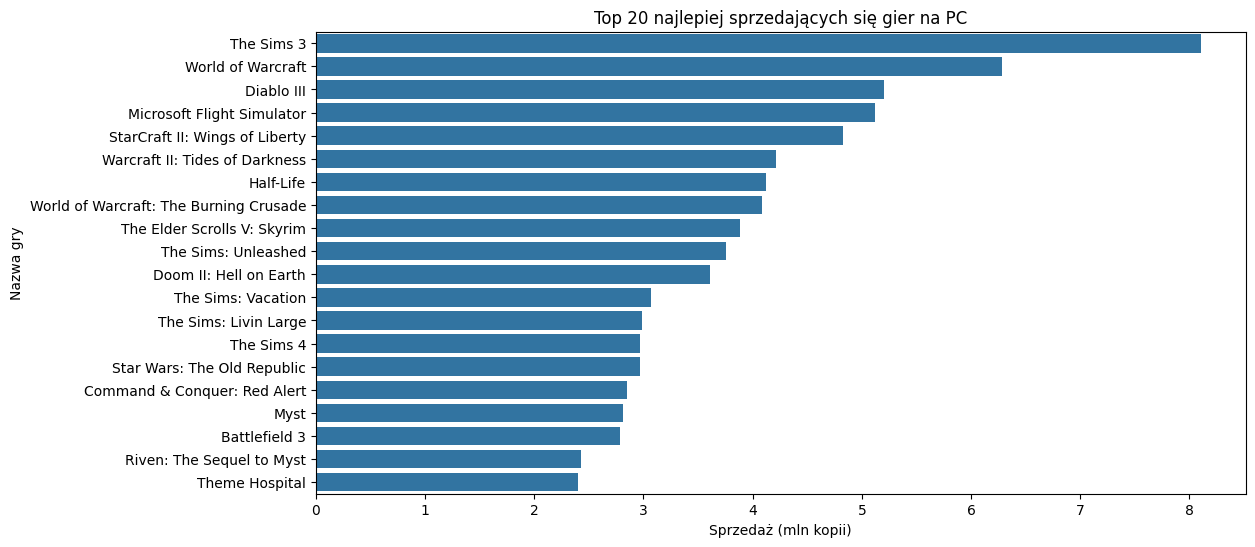

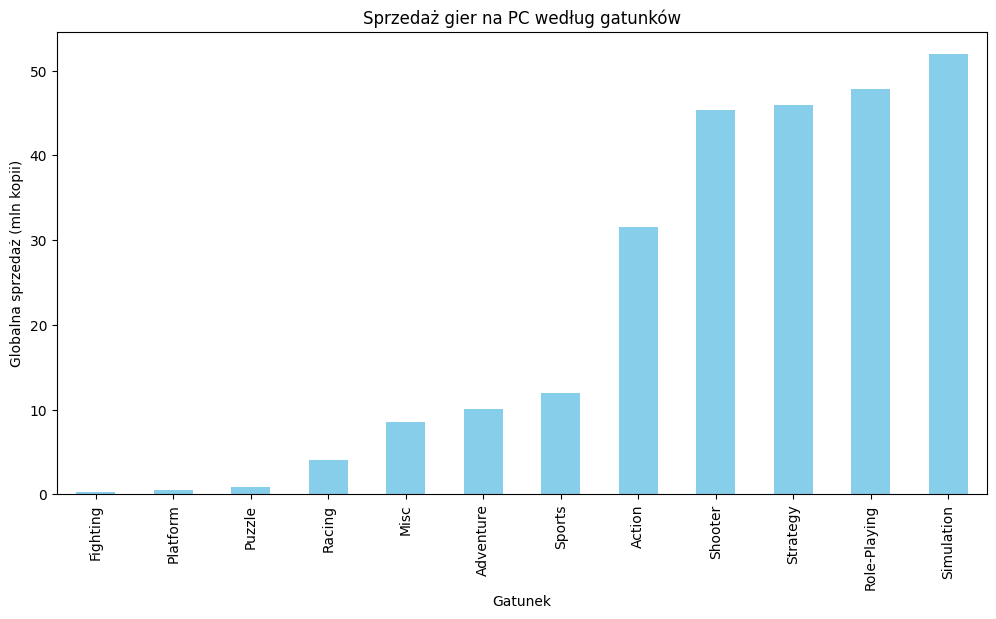

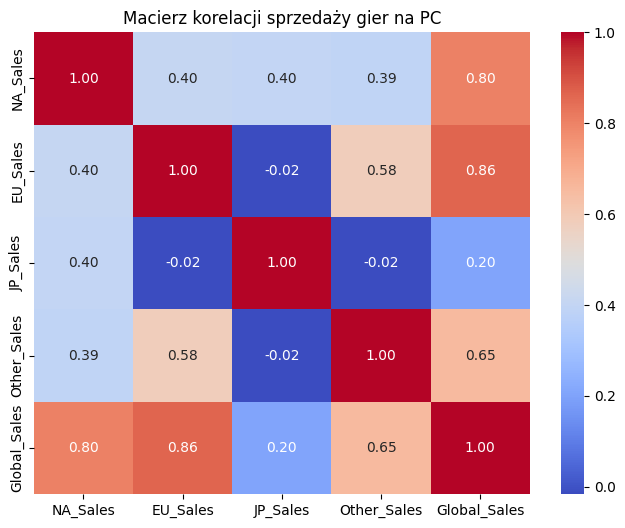

In [33]:
# Top 10 najlepiej sprzedających się gier na PC
top_games = df.nlargest(20, 'Global_Sales')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_games['Name'], x=top_games['Global_Sales'])
plt.title("Top 20 najlepiej sprzedających się gier na PC")
plt.xlabel("Sprzedaż (mln kopii)")
plt.ylabel("Nazwa gry")
plt.show()

# Sprzedaż w podziale na gatunki
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values()
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title("Sprzedaż gier na PC według gatunków")
plt.xlabel("Gatunek")
plt.ylabel("Globalna sprzedaż (mln kopii)")
plt.show()

# Korelacja między zmiennymi
df_corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji sprzedaży gier na PC")
plt.show()

# Nvidia.csv
https://www.kaggle.com/datasets/elmartini/stock-prices-intel-nvidia-and-amd

Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5862 non-null   datetime64[ns]
 1   open    5862 non-null   float64       
 2   high    5862 non-null   float64       
 3   low     5862 non-null   float64       
 4   close   5862 non-null   float64       
 5   volume  5862 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 274.9 KB
None

Brakujące wartości:
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Podstawowe statystyki:
                                date         open         high          low  \
count                           5862  5862.000000  5862.000000  5862.000000   
mean   2010-09-15 05:57:25.240531968    25.007924    25.458696    24.508434   
min              1999-01-22 00:00:00     0.320900     0.326800     0.306500 

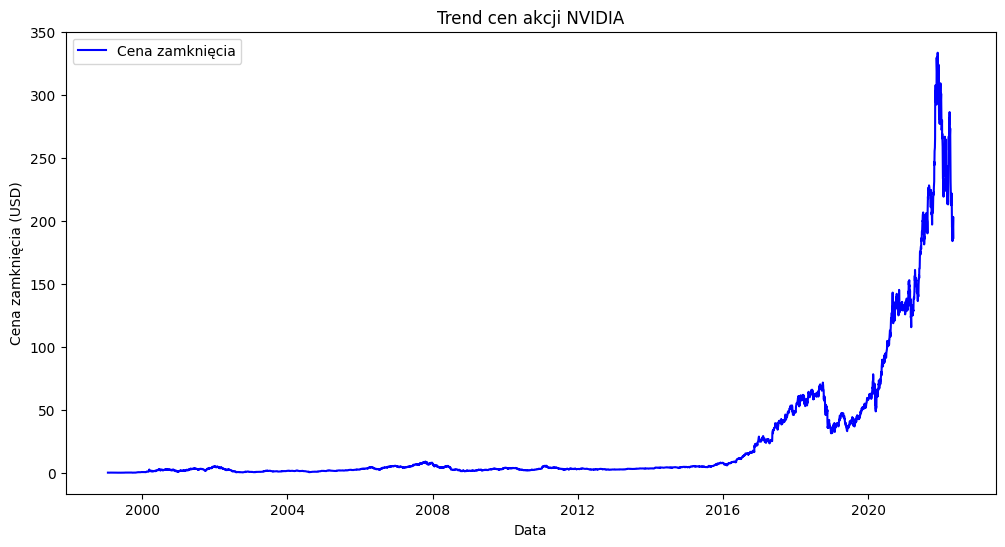

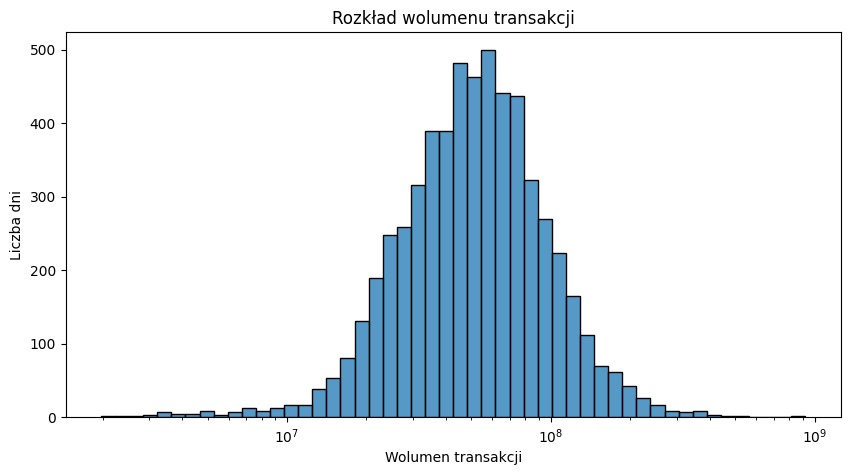

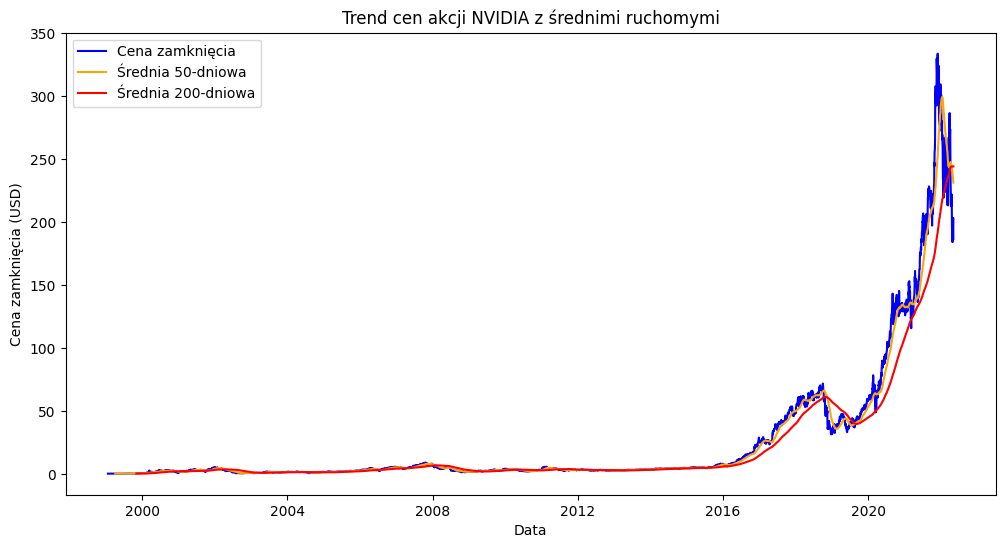

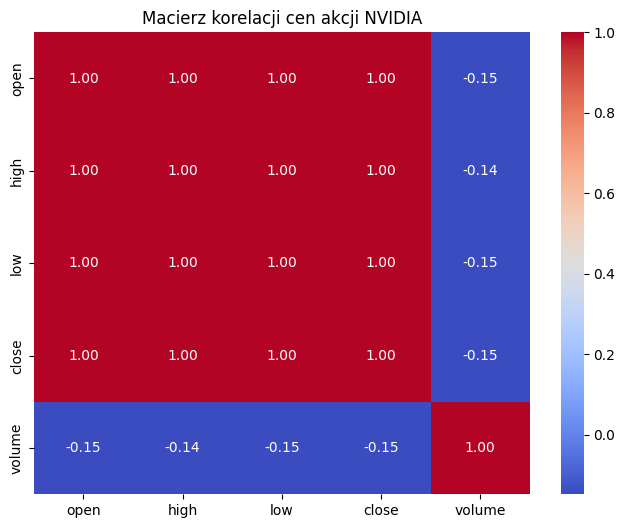

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
df = pd.read_csv("DBs/Nvidia.csv")

# Czyszczenie danych
df.columns = df.columns.str.strip()  # Usunięcie spacji z nazw kolumn

# Konwersja kolumny 'date' na typ datetime
df['date'] = pd.to_datetime(df['date'])

# Podstawowa eksploracja danych
print("Podstawowe informacje:")
print(df.info())
print("\nBrakujące wartości:")
print(df.isnull().sum())
print("\nPodstawowe statystyki:")
print(df.describe())

# Wizualizacja trendu cen akcji
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Cena zamknięcia', color='blue')
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Trend cen akcji NVIDIA")
plt.legend()
plt.show()

# Rozkład wolumenu transakcji
plt.figure(figsize=(10, 5))
sns.histplot(df['volume'], bins=50, log_scale=True)
plt.title("Rozkład wolumenu transakcji")
plt.xlabel("Wolumen transakcji")
plt.ylabel("Liczba dni")
plt.show()

# Średnia ruchoma 50-dniowa i 200-dniowa
df['SMA_50'] = df['close'].rolling(window=50).mean()
df['SMA_200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Cena zamknięcia', color='blue')
plt.plot(df['date'], df['SMA_50'], label='Średnia 50-dniowa', color='orange')
plt.plot(df['date'], df['SMA_200'], label='Średnia 200-dniowa', color='red')
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Trend cen akcji NVIDIA z średnimi ruchomymi")
plt.legend()
plt.show()

# Korelacja między zmiennymi
df_corr = df[['open', 'high', 'low', 'close', 'volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji cen akcji NVIDIA")
plt.show()


# Nvidia vs premiery gier

In [8]:
# Lista gier wideo wraz z datami wydań
game_releases = {
    "Myst": "1993-09-24",
    "Doom II": "1994-09-30",
    "WarCraft II": "1995-12-09",
    "Command & Conquer: Red Alert": "1996-10-31",
    "Theme Hospital": "1997-02-28",
    "Riven": "1997-10-31",
    "Half-Life": "1998-11-19",
    "The Sims 3": "2009-06-02",
    "StarCraft II": "2010-07-27",
    "Skyrim": "2011-11-11",
    "Battlefield 3": "2011-10-25",
    "Diablo III": "2012-05-15",
    "The Sims 4": "2014-09-02",
    "Cyberpunk 2077": "2020-12-10",
    "Elden Ring": "2022-02-25",
    "Hogwarts Legacy": "2023-02-10"
}

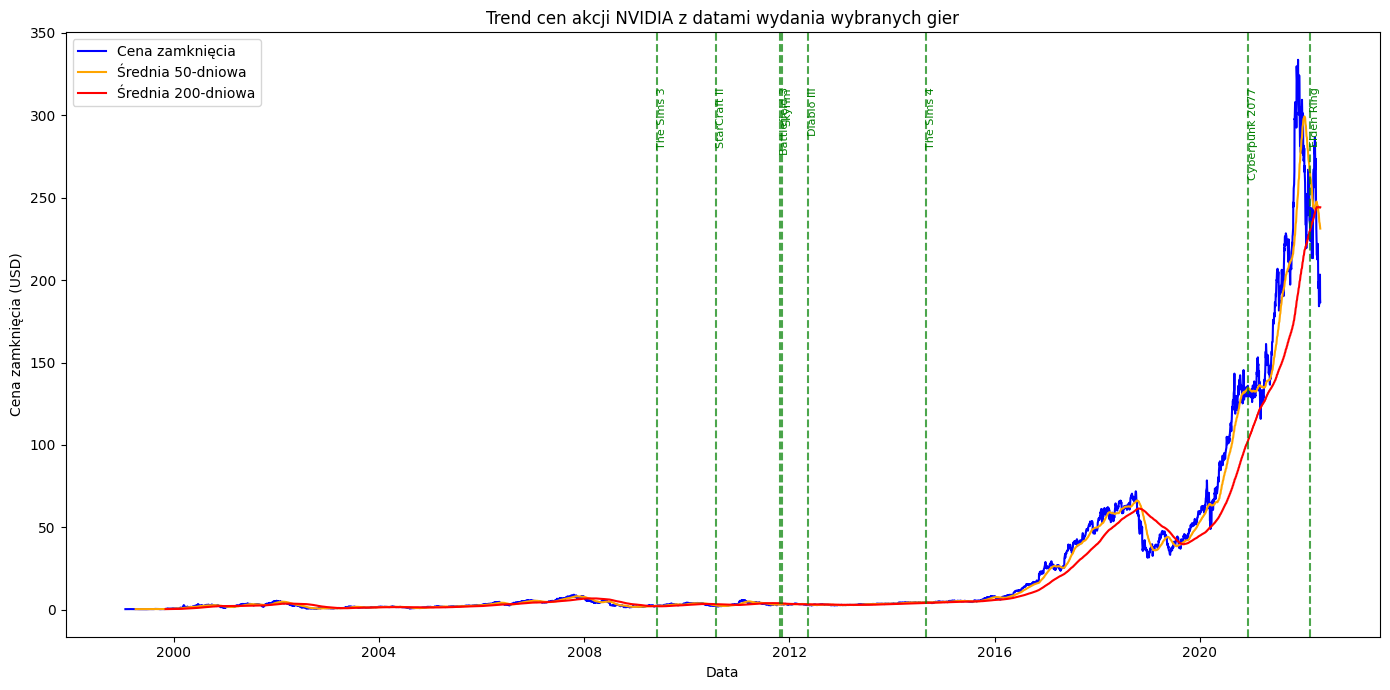

In [9]:
# Konwersja dat do datetime
game_dates = {title: pd.to_datetime(date) for title, date in game_releases.items()}

# Wykres akcji z premierami gier wideo
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Cena zamknięcia', color='blue')
plt.plot(df['date'], df['SMA_50'], label='Średnia 50-dniowa', color='orange')
plt.plot(df['date'], df['SMA_200'], label='Średnia 200-dniowa', color='red')

# Dodanie pionowych linii i labelek
for title, release_date in game_dates.items():
    if df['date'].min() <= release_date <= df['date'].max():
        plt.axvline(x=release_date, color='green', linestyle='--', alpha=0.7)
        plt.text(release_date, df['close'].max()*0.95, title, rotation=90,
                 verticalalignment='top', fontsize=8, color='green')

plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Trend cen akcji NVIDIA z datami wydania wybranych gier")
plt.legend()
plt.tight_layout()
plt.show()


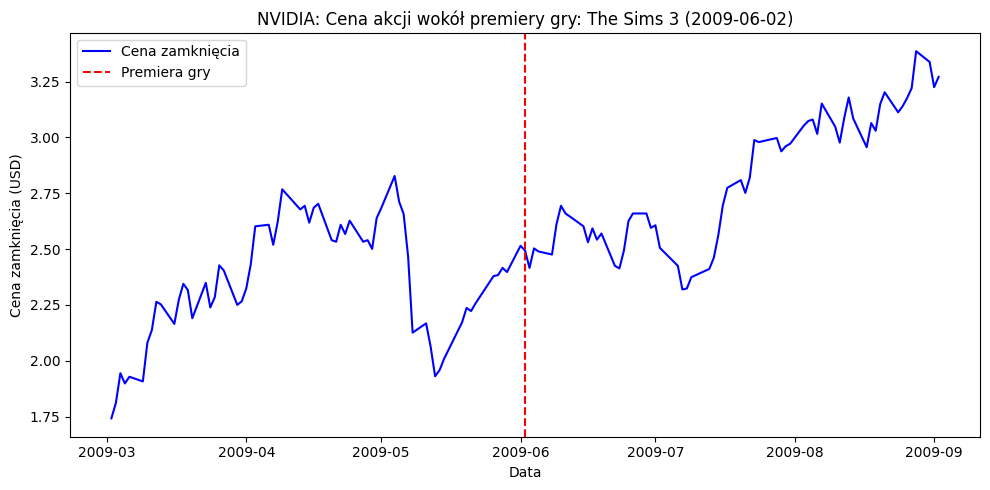

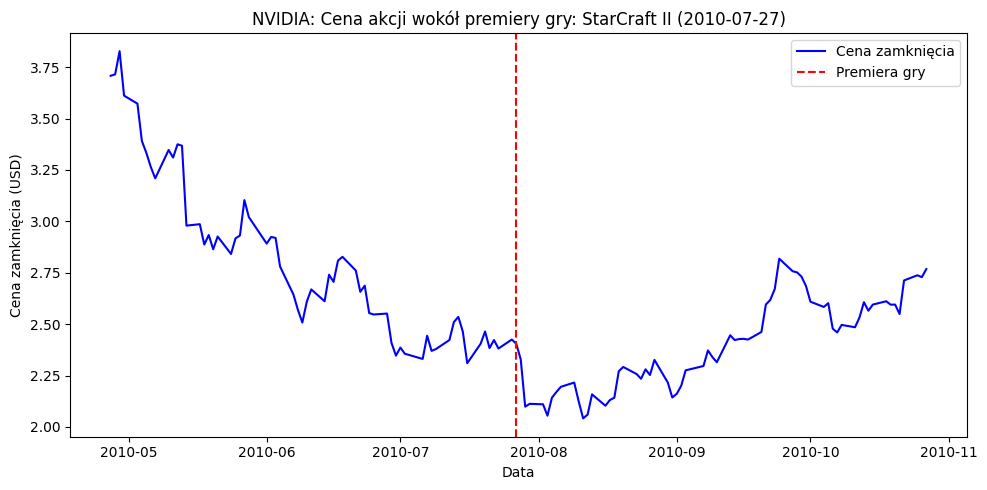

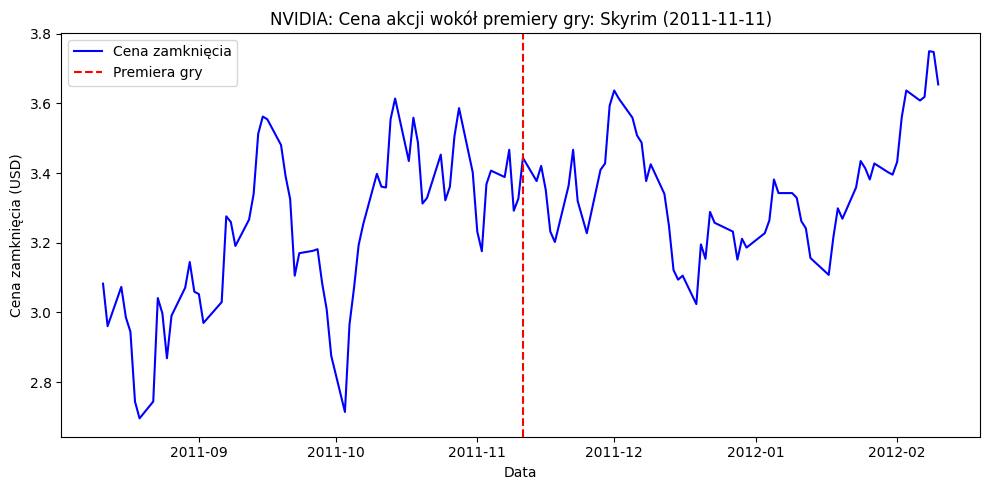

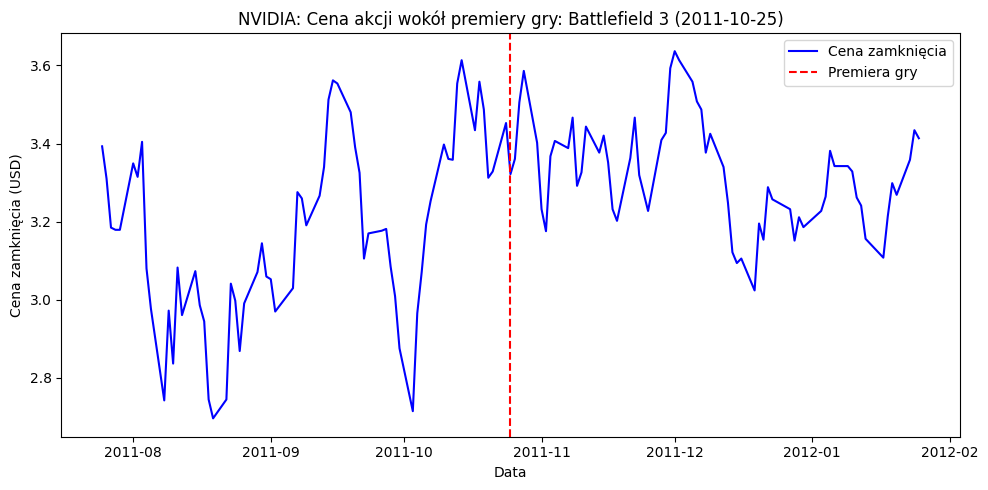

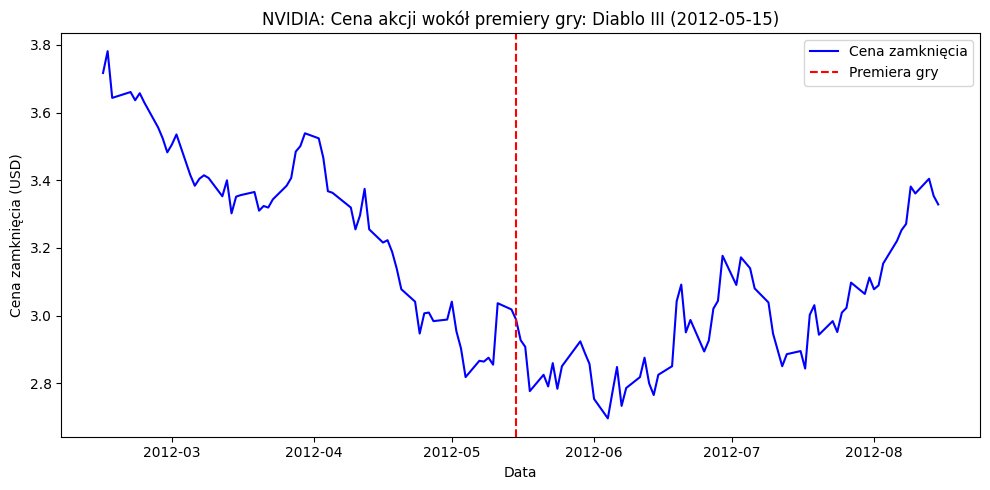

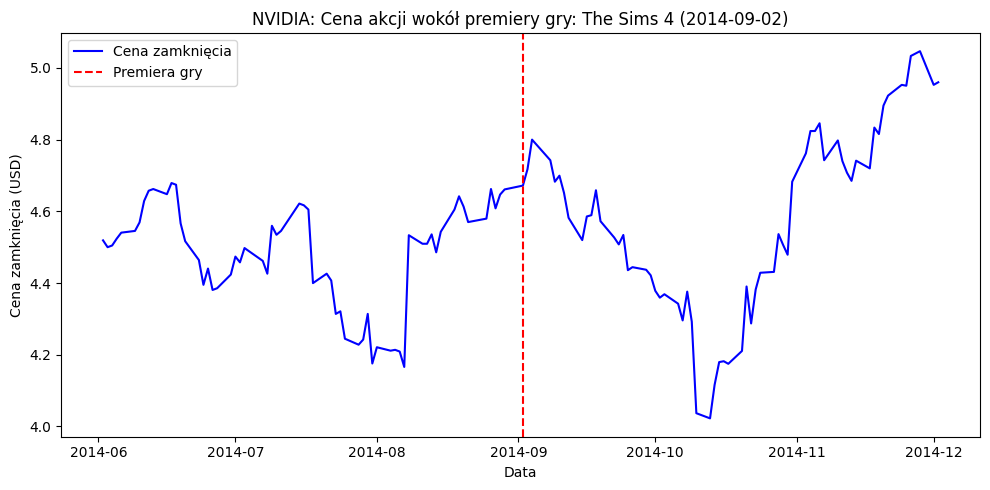

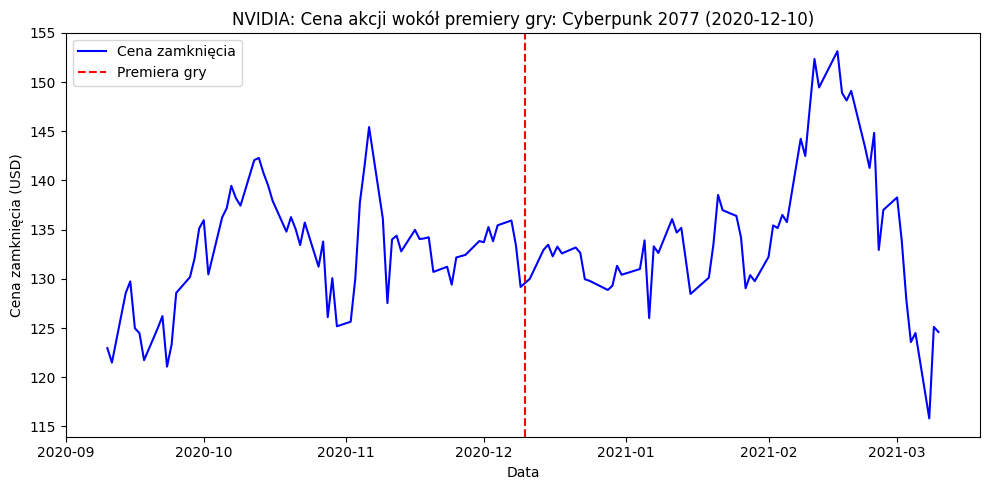

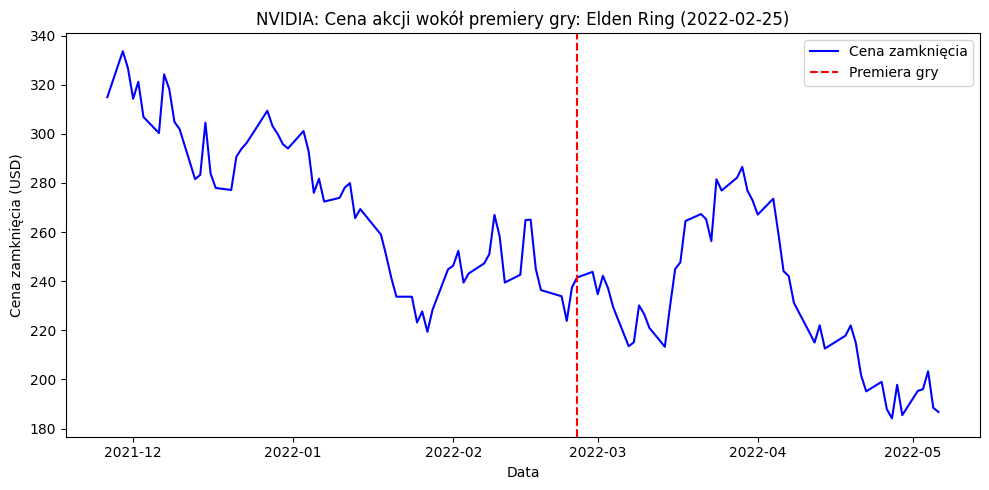

In [10]:
from datetime import timedelta

# Zakres
delta = pd.DateOffset(months=3)

# Przekształcenie game_dates na listę krotek
game_release_list = [(title, pd.to_datetime(date)) for title, date in game_releases.items()]

# Filtracja: tylko gry, których daty są w zakresie danych
valid_games = [(title, date) for title, date in game_release_list if df['date'].min() <= date <= df['date'].max()]

# Wykresy dla poszczegulnych gier
for title, release_date in valid_games:
    start_window = release_date - delta
    end_window = release_date + delta
    mask = (df['date'] >= start_window) & (df['date'] <= end_window)
    local_df = df.loc[mask]

    plt.figure(figsize=(10, 5))
    plt.plot(local_df['date'], local_df['close'], label='Cena zamknięcia', color='blue')
    plt.axvline(x=release_date, color='red', linestyle='--', label='Premiera gry')
    plt.title(f"NVIDIA: Cena akcji wokół premiery gry: {title} ({release_date.date()})")
    plt.xlabel("Data")
    plt.ylabel("Cena zamknięcia (USD)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [11]:
from scipy.stats import ttest_ind

# Analiza wpływu + t-test
results = []
for title, release_date in game_dates.items():
    if not (df['date'].min() <= release_date <= df['date'].max()):
        continue # Pominięcie tytułów spoza zakresu
        
    # Maskowanie dat przed i po premierze
    pre_mask = (df['date'] >= release_date - pd.DateOffset(months=3)) & (df['date'] < release_date) # Przed releasem
    post_mask = (df['date'] > release_date) & (df['date'] <= release_date + pd.DateOffset(months=3)) # Po release

    pre_data = df.loc[pre_mask, 'close']
    post_data = df.loc[post_mask, 'close']

    # Pominięcie pustych maskowanych danych
    if pre_data.empty or post_data.empty:
        continue

    # Wyliczanie średnich, różnicy i współczynika zmiany (%)
    pre_mean = pre_data.mean()
    post_mean = post_data.mean()
    diff = post_mean - pre_mean
    pct_change = (diff / pre_mean) * 100 

    # Test statystyczny (t-test)
    t_stat, p_value = ttest_ind(post_data, pre_data, equal_var=False)  # wariancje mogą się różnić

    # Dodanie wyników do results
    results.append({
        "Gra": title,
        "Data premiery": release_date.date(),
        "Średnia przed": round(pre_mean, 2),
        "Średnia po": round(post_mean, 2),
        "Różnica": round(diff, 2),
        "Zmiana (%)": round(pct_change, 2),
        "p-wartość": round(p_value, 4),
        "Istotne statystycznie (p < 0.05)": "Tak" if p_value < 0.05 else "Nie"
    })

# Tworzenie tabeli wyników
results_df = pd.DataFrame(results)
print(results_df)

              Gra Data premiery  Średnia przed  Średnia po  Różnica  \
0      The Sims 3    2009-06-02           2.35        2.80     0.45   
1    StarCraft II    2010-07-27           2.81        2.40    -0.41   
2          Skyrim    2011-11-11           3.22        3.36     0.14   
3   Battlefield 3    2011-10-25           3.17        3.33     0.15   
4      Diablo III    2012-05-15           3.30        2.98    -0.31   
5      The Sims 4    2014-09-02           4.48        4.58     0.10   
6  Cyberpunk 2077    2020-12-10         132.56      134.76     2.21   
7      Elden Ring    2022-02-25         272.67      231.05   -41.62   

   Zmiana (%)  p-wartość Istotne statystycznie (p < 0.05)  
0       19.22     0.0000                              Tak  
1      -14.65     0.0000                              Tak  
2        4.39     0.0002                              Tak  
3        4.84     0.0000                              Tak  
4       -9.46     0.0000                              Tak  


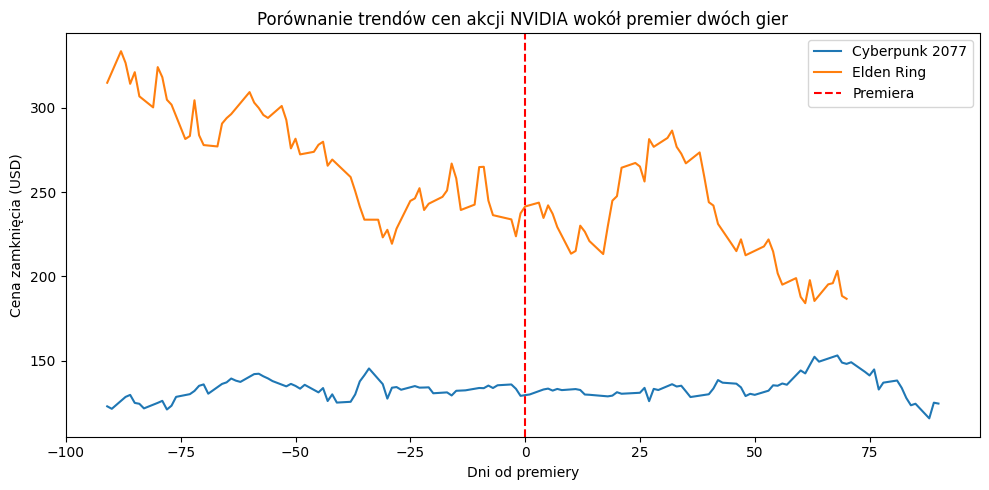

In [13]:
# Gry do porównania
games_to_compare = ["Cyberpunk 2077", "Elden Ring"]
delta = pd.DateOffset(months=3)

# Dane przesunięte względem premiery
aligned_data = {}

for title, release_date in valid_games:
    if title not in games_to_compare:
        continue

    start_window = release_date - delta
    end_window = release_date + delta
    mask = (df['date'] >= start_window) & (df['date'] <= end_window)
    local_df = df.loc[mask].copy()

    # Przesunięcie względem dnia premiery
    local_df['days_from_release'] = (local_df['date'] - release_date).dt.days
    aligned_data[title] = local_df[['days_from_release', 'close']]

# Wspólny wykres porównawczy trendów
plt.figure(figsize=(10, 5))

for title, data in aligned_data.items():
    plt.plot(data['days_from_release'], data['close'], label=title)

plt.axvline(x=0, color='red', linestyle='--', label='Premiera')
plt.title("Porównanie trendów cen akcji NVIDIA wokół premier dwóch gier")
plt.xlabel("Dni od premiery")
plt.ylabel("Cena zamknięcia (USD)")
plt.legend()
plt.tight_layout()
plt.show()

# AMD.csv
https://www.kaggle.com/datasets/elmartini/stock-prices-intel-nvidia-and-amd

Podstawowe informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9866 non-null   datetime64[ns]
 1   open    9866 non-null   float64       
 2   high    9866 non-null   float64       
 3   low     9866 non-null   float64       
 4   close   9866 non-null   float64       
 5   volume  9866 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 462.6 KB
None

Brakujące wartości:
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Podstawowe statystyki:
                                date         open        high          low  \
count                           9866  9866.000000  9866.00000  9866.000000   
mean   2002-10-05 19:30:25.177376896    16.101348    16.43892    15.732886   
min              1983-03-21 00:00:00     1.620000     1.69000     1.610000   
2

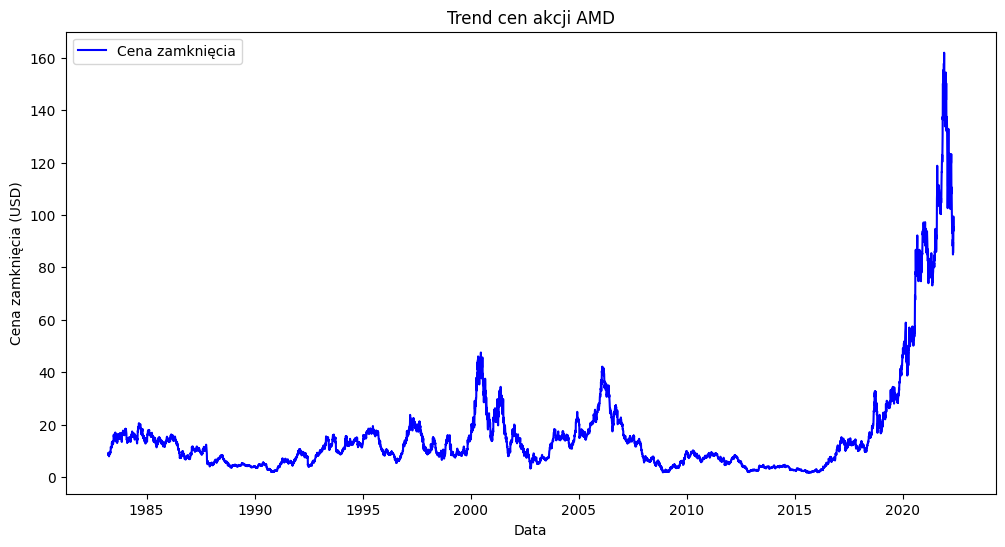

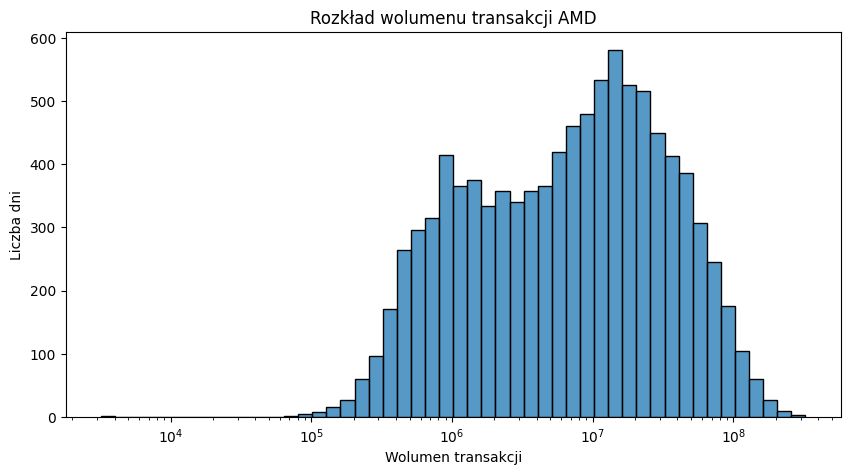

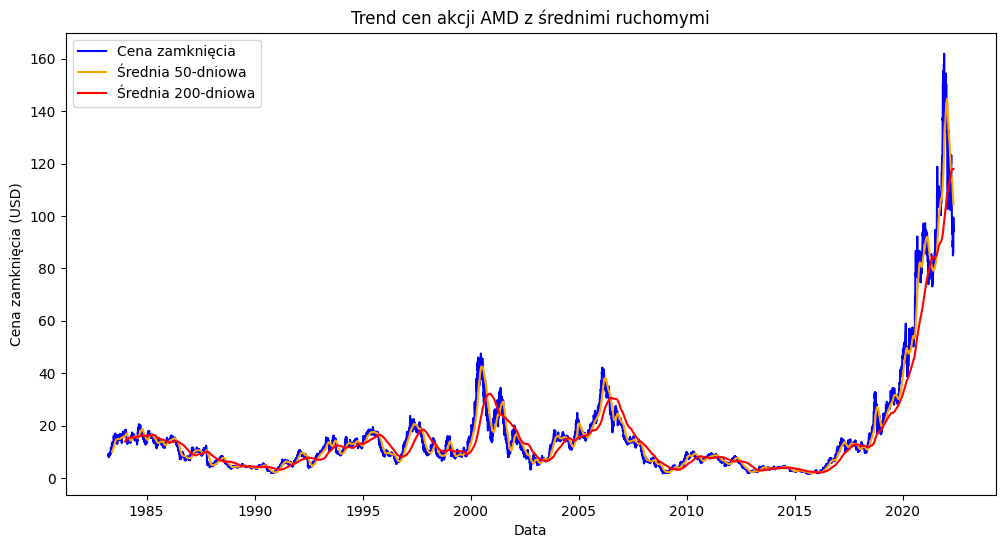

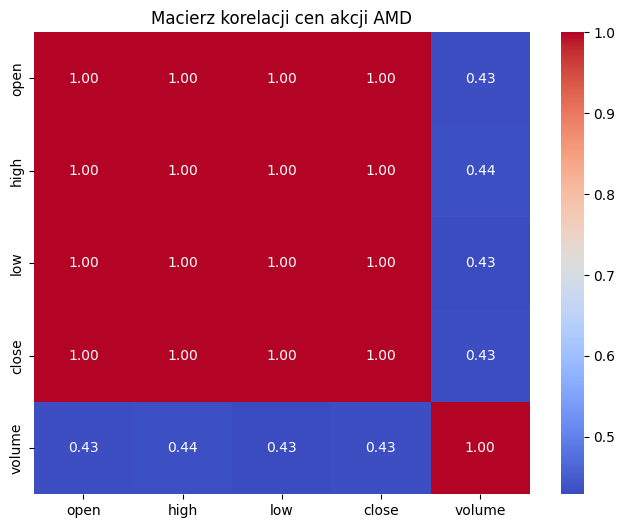

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
df = pd.read_csv("DBs/AMD.csv")

# Czyszczenie danych
df.columns = df.columns.str.strip()  # Usunięcie spacji z nazw kolumn

# Konwersja kolumny 'date' na typ datetime
df['date'] = pd.to_datetime(df['date'])

# Podstawowa eksploracja danych
print("Podstawowe informacje:")
print(df.info())
print("\nBrakujące wartości:")
print(df.isnull().sum())
print("\nPodstawowe statystyki:")
print(df.describe())

# Wizualizacja trendu cen akcji
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Cena zamknięcia', color='blue')
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Trend cen akcji AMD")
plt.legend()
plt.show()

# Rozkład wolumenu transakcji
plt.figure(figsize=(10, 5))
sns.histplot(df['volume'], bins=50, log_scale=True)
plt.title("Rozkład wolumenu transakcji AMD")
plt.xlabel("Wolumen transakcji")
plt.ylabel("Liczba dni")
plt.show()

# Średnia ruchoma 50-dniowa i 200-dniowa
df['SMA_50'] = df['close'].rolling(window=50).mean()
df['SMA_200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Cena zamknięcia', color='blue')
plt.plot(df['date'], df['SMA_50'], label='Średnia 50-dniowa', color='orange')
plt.plot(df['date'], df['SMA_200'], label='Średnia 200-dniowa', color='red')
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Trend cen akcji AMD z średnimi ruchomymi")
plt.legend()
plt.show()

# Korelacja między zmiennymi
df_corr = df[['open', 'high', 'low', 'close', 'volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji cen akcji AMD")
plt.show()


# AMD vs premiery gier

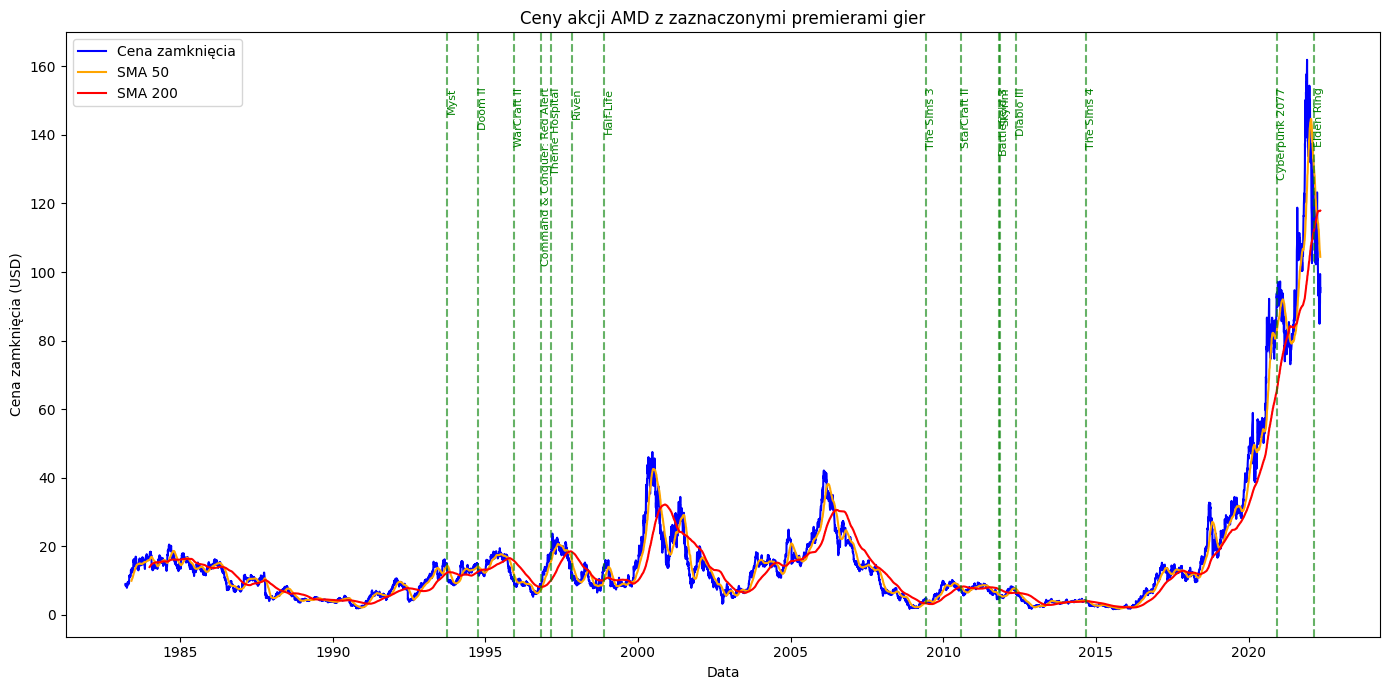

In [17]:
game_dates = {title: pd.to_datetime(date) for title, date in game_releases.items()}

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Cena zamknięcia', color='blue')
plt.plot(df['date'], df['SMA_50'], label='SMA 50', color='orange')
plt.plot(df['date'], df['SMA_200'], label='SMA 200', color='red')

for title, date in game_dates.items():
    if df['date'].min() <= date <= df['date'].max():
        plt.axvline(x=date, color='green', linestyle='--', alpha=0.6)
        plt.text(date, df['close'].max()*0.95, title, rotation=90, fontsize=8, color='green', va='top')

plt.title("Ceny akcji AMD z zaznaczonymi premierami gier")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.legend()
plt.tight_layout()
plt.show()

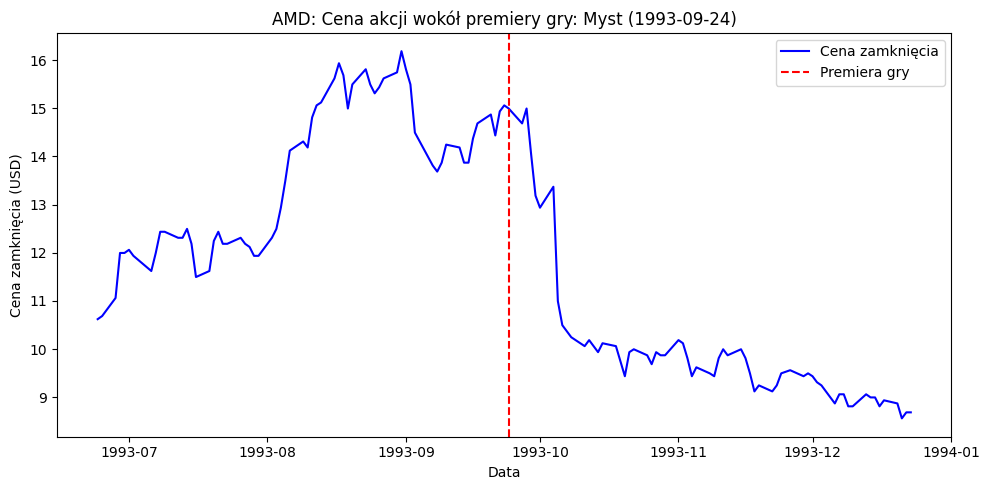

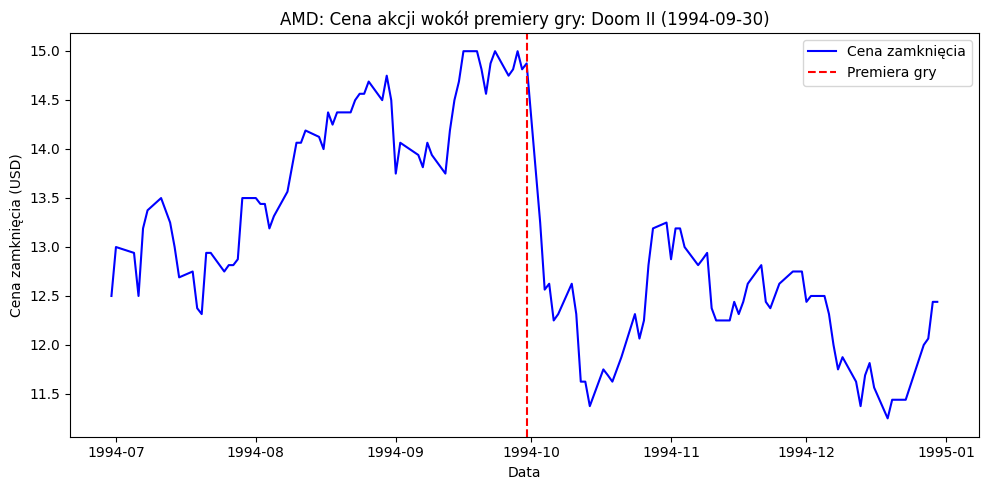

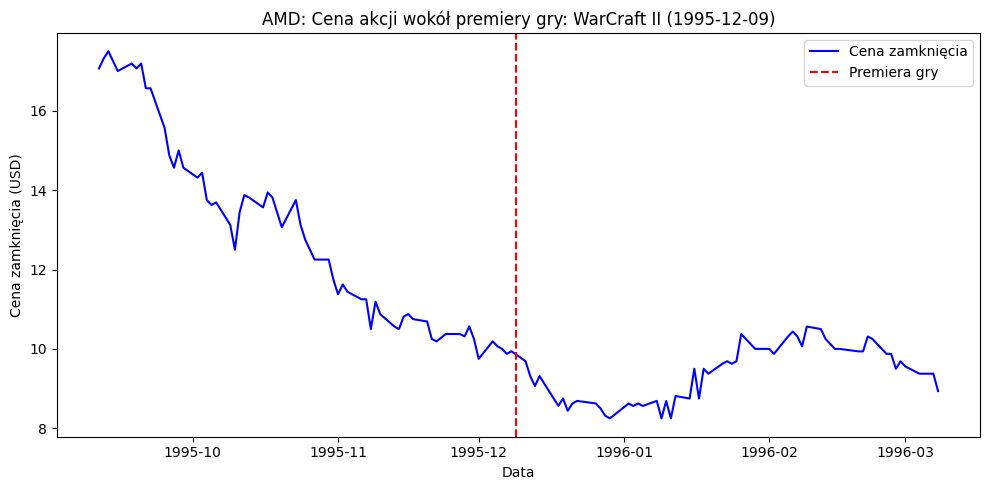

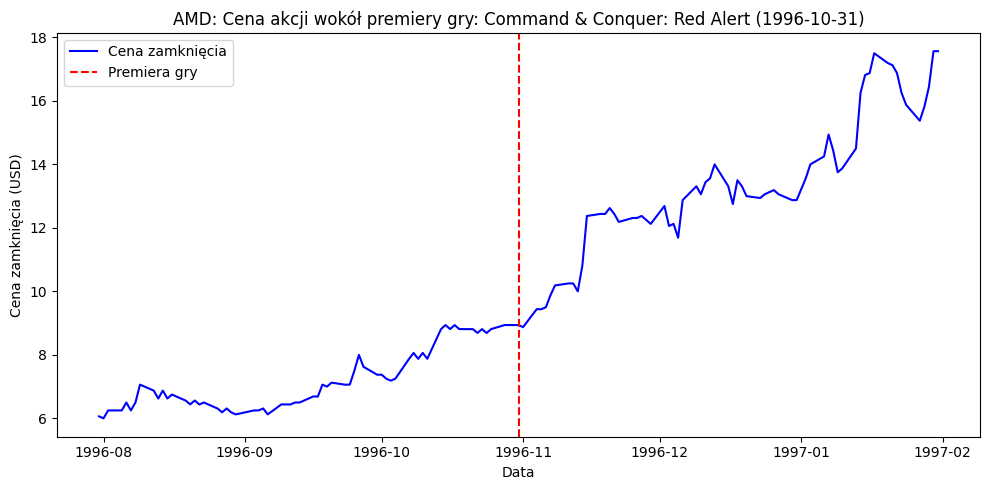

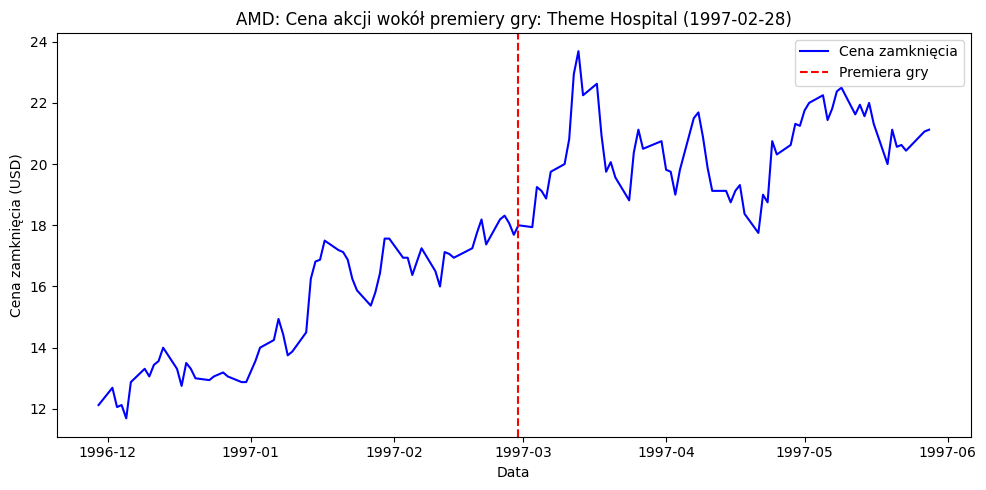

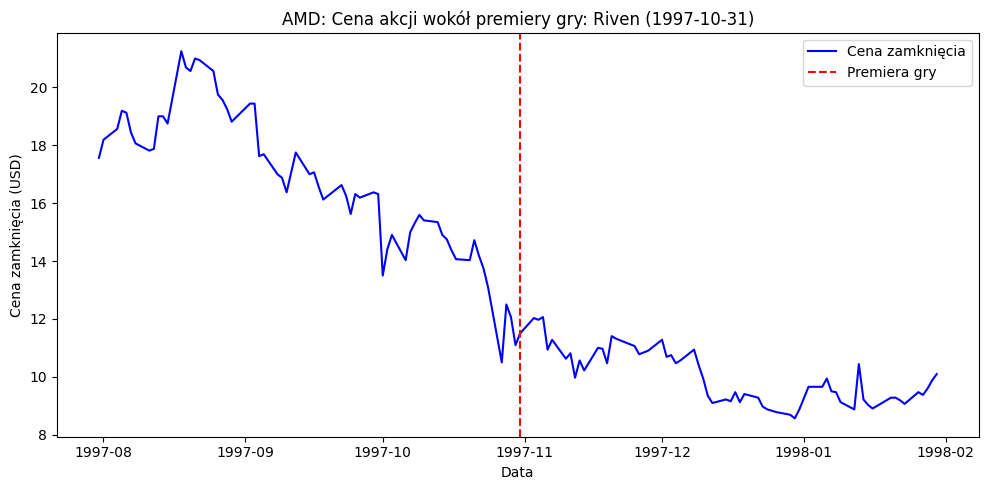

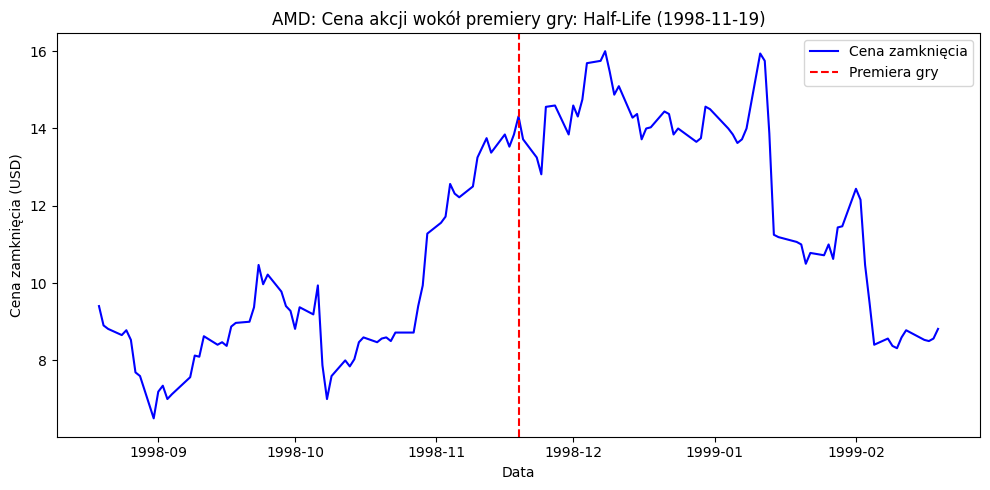

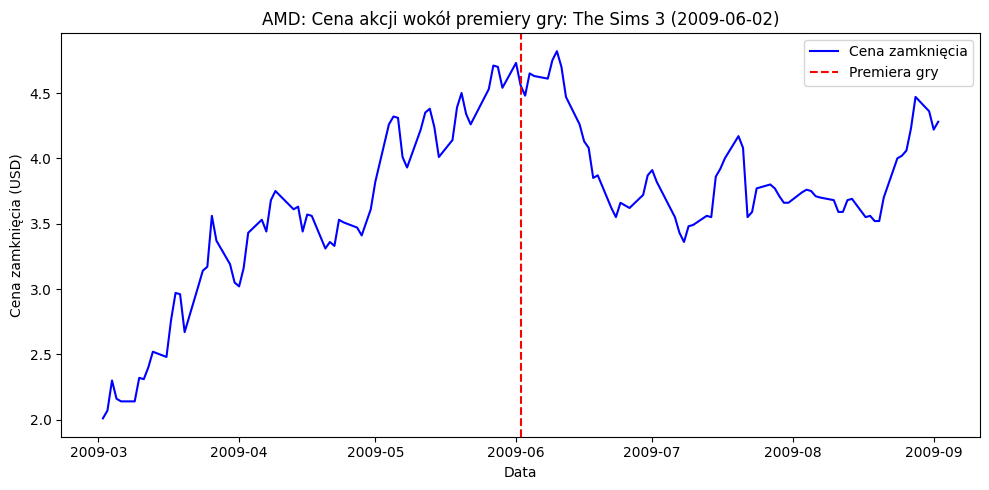

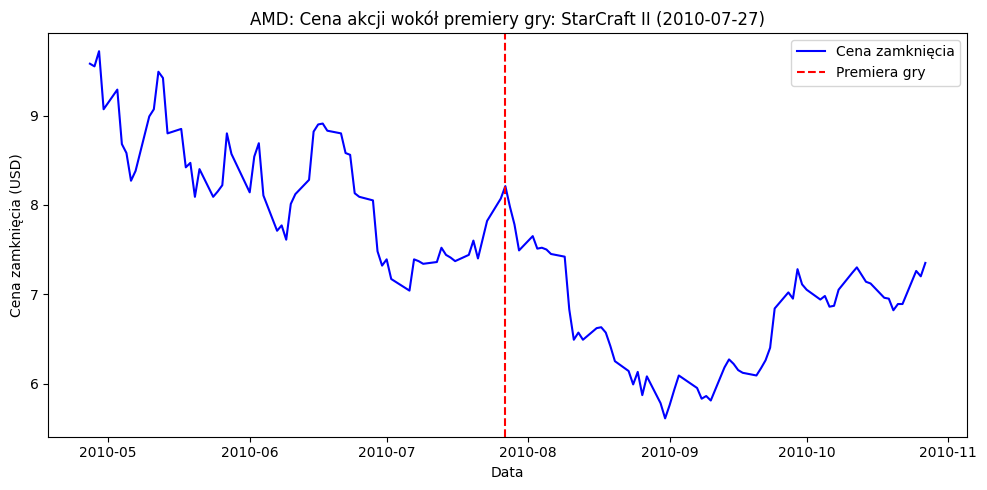

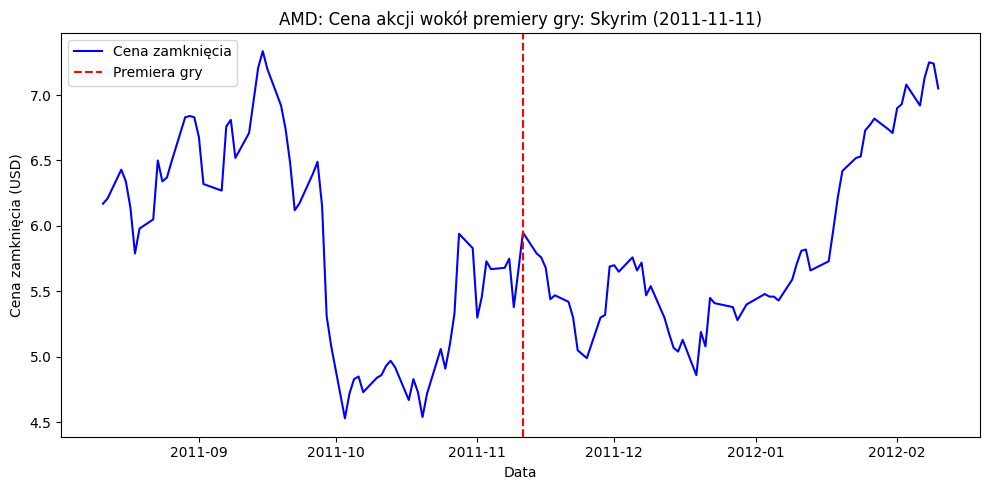

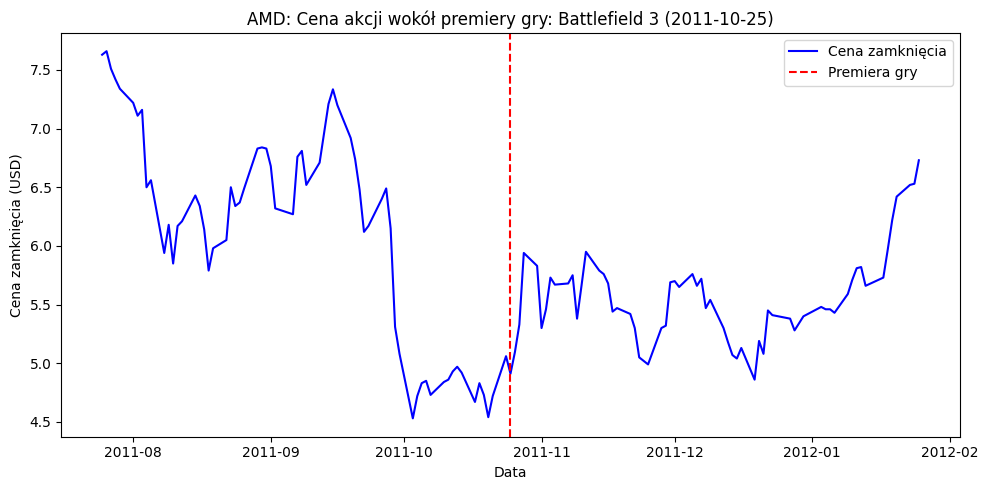

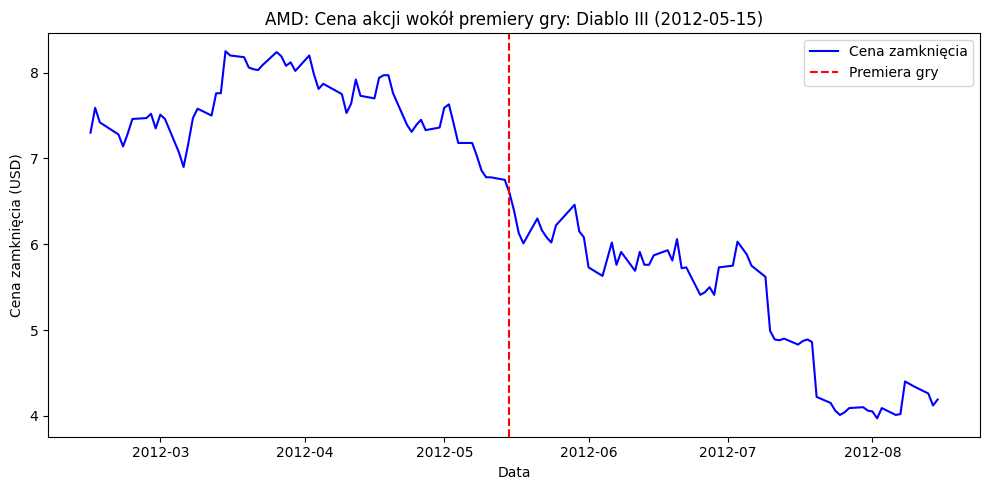

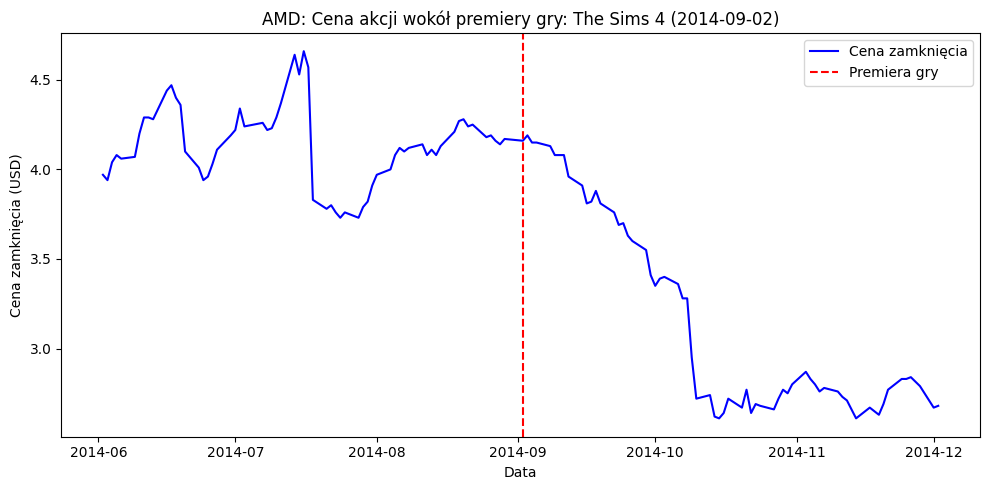

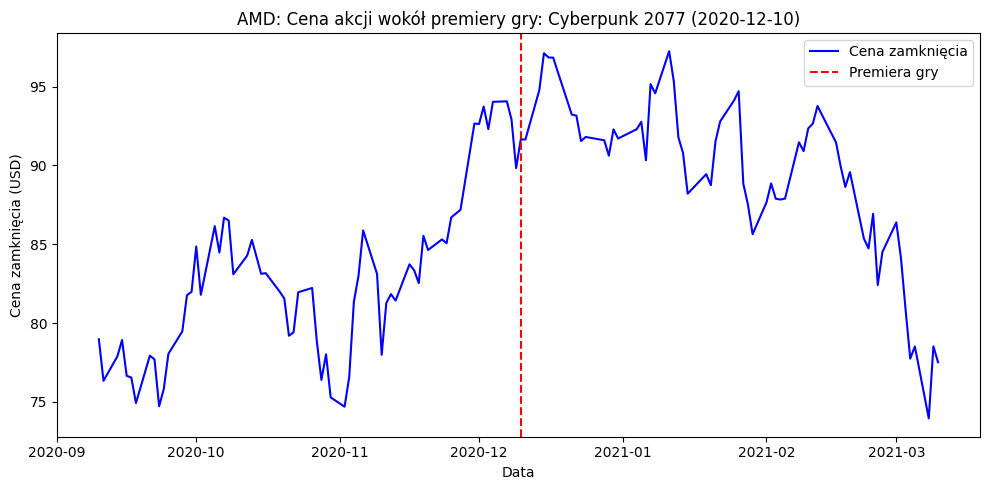

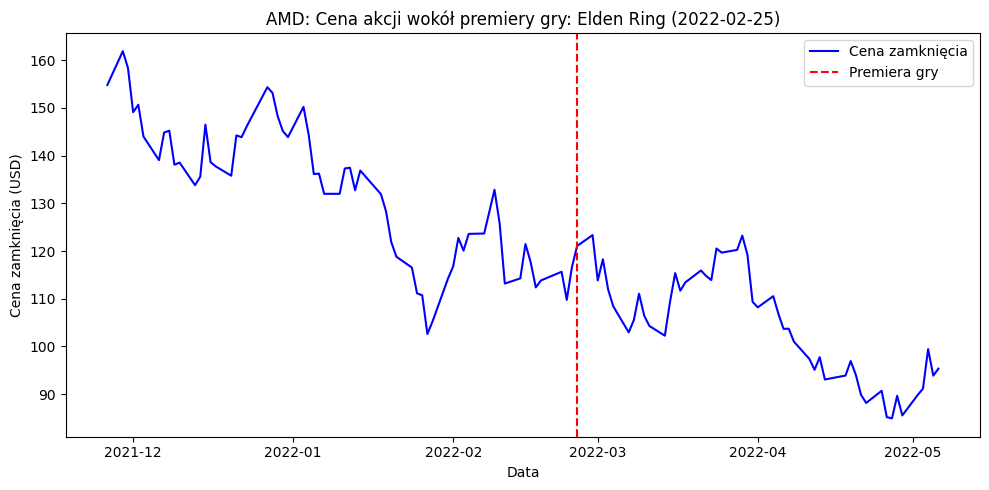

In [18]:
delta = pd.DateOffset(months=3)

for title, release_date in game_dates.items():
    if df['date'].min() <= release_date <= df['date'].max():
        mask = (df['date'] >= release_date - delta) & (df['date'] <= release_date + delta)
        local_df = df.loc[mask]
        
        if local_df.empty:
            continue

        plt.figure(figsize=(10, 5))
        plt.plot(local_df['date'], local_df['close'], label='Cena zamknięcia', color='blue')
        plt.axvline(x=release_date, color='red', linestyle='--', label='Premiera gry')
        plt.title(f"AMD: Cena akcji wokół premiery gry: {title} ({release_date.date()})")
        plt.xlabel("Data")
        plt.ylabel("Cena zamknięcia (USD)")
        plt.legend()
        plt.tight_layout()
        plt.show()


In [19]:
from scipy.stats import ttest_ind

results = []
for title, release_date in game_dates.items():
    if not (df['date'].min() <= release_date <= df['date'].max()):
        continue

    pre = df[(df['date'] >= release_date - pd.DateOffset(months=3)) & (df['date'] < release_date)]['close']
    post = df[(df['date'] > release_date) & (df['date'] <= release_date + pd.DateOffset(months=3))]['close']

    if pre.empty or post.empty:
        continue

    pre_mean = pre.mean()
    post_mean = post.mean()
    diff = post_mean - pre_mean
    pct = (diff / pre_mean) * 100
    t_stat, p_value = ttest_ind(post, pre, equal_var=False)

    results.append({
        "Gra": title,
        "Data premiery": release_date.date(),
        "Średnia przed ($)": round(pre_mean, 2),
        "Średnia po ($)": round(post_mean, 2),
        "Różnica ($)": round(diff, 2),
        "Zmiana (%)": round(pct, 2),
        "p-wartość": round(p_value, 4),
        "Istotna zmiana (p < 0.05)": "Tak" if p_value < 0.05 else "Nie"
    })

# Tabela wyników
amd_results = pd.DataFrame(results)
print(amd_results)


                             Gra Data premiery  Średnia przed ($)  \
0                           Myst    1993-09-24              13.57   
1                        Doom II    1994-09-30              13.82   
2                    WarCraft II    1995-12-09              12.87   
3   Command & Conquer: Red Alert    1996-10-31               7.21   
4                 Theme Hospital    1997-02-28              15.20   
5                          Riven    1997-10-31              16.73   
6                      Half-Life    1998-11-19               9.48   
7                     The Sims 3    2009-06-02               3.47   
8                   StarCraft II    2010-07-27               8.24   
9                         Skyrim    2011-11-11               5.85   
10                 Battlefield 3    2011-10-25               6.13   
11                    Diablo III    2012-05-15               7.59   
12                    The Sims 4    2014-09-02               4.14   
13                Cyberpunk 2077  

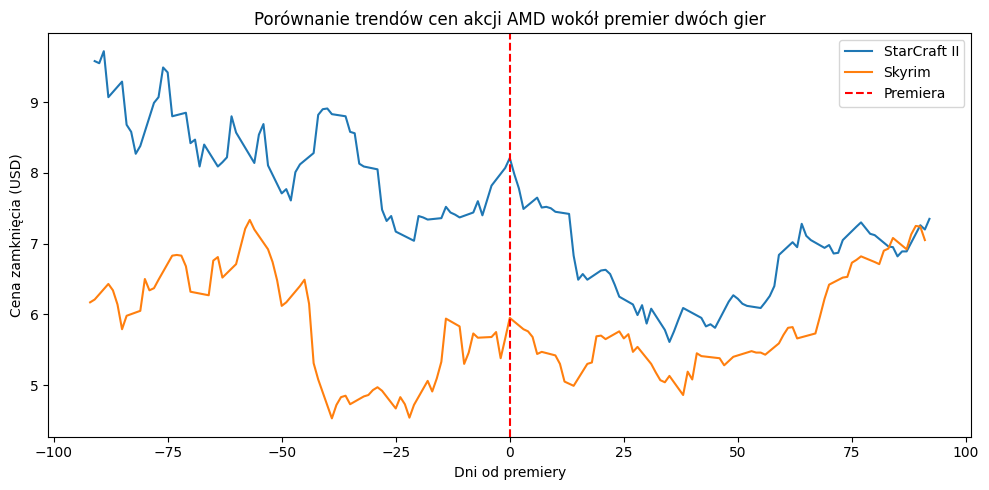

In [20]:
# Gry do porównania
games_to_compare = ["StarCraft II", "Skyrim"]
delta = pd.DateOffset(months=3)

# Przekształcenie game_dates na listę krotek
game_release_list = [(title, pd.to_datetime(date)) for title, date in game_releases.items()]

# Filtracja: tylko gry, których daty są w zakresie danych
valid_games = [(title, date) for title, date in game_release_list if df['date'].min() <= date <= df['date'].max()]

# Dane przesunięte względem premiery
aligned_data = {}

for title, release_date in valid_games:
    if title not in games_to_compare:
        continue

    start_window = release_date - delta
    end_window = release_date + delta
    mask = (df['date'] >= start_window) & (df['date'] <= end_window)
    local_df = df.loc[mask].copy()

    # Przesunięcie względem dnia premiery
    local_df['days_from_release'] = (local_df['date'] - release_date).dt.days
    aligned_data[title] = local_df[['days_from_release', 'close']]

# Wspólny wykres porównawczy trendów
plt.figure(figsize=(10, 5))

for title, data in aligned_data.items():
    plt.plot(data['days_from_release'], data['close'], label=title)

plt.axvline(x=0, color='red', linestyle='--', label='Premiera')
plt.title("Porównanie trendów cen akcji AMD wokół premier dwóch gier")
plt.xlabel("Dni od premiery")
plt.ylabel("Cena zamknięcia (USD)")
plt.legend()
plt.tight_layout()
plt.show()